Dependencies:

- numpy
- scipy
- nltk
- sklearn
- matplotlib
- pandas
- gensim
- networkx
- graphviz
- libtool
- spacy (optional)


```
python -m spacy.en.download all
$brew install libtool
$conda create -n PUB_NLP python=3 numpy scipy nltk sklearn matplotlib pandas gensim networkx graphviz spacy
$source activate PUB_NLP
```

_On OsX use_ `brew` _on GNU/linux_ `apt-get` _or_ `yum` _to install_ `libtool` _if needed_

In [4]:
%matplotlib inline

# NLP and Python
### Python Users Berlin 29.9.2015

- Matti Lyra
- @mattilyra
- m.lyra@sussex.ac.uk
- https://github.com/mattilyra/PUB_nlp

# University of Sussex
## Text Analytics Lab

- 5 years old
- 7 PhD Students
- 4 Research Fellows
- Active in academic research and industrial applications

![Paprr](./paprr.1.png)

## currently in public beta
### www.paprr.co


# Python and NLP

### http://www.nltk.org/book/

- `NLTK` / `sklearn` / `gensim`
- An overview of NLP tools in Python
    - strings to things (segmentation, tokenisation, text normalisation)
    - feature frequencies (smoothing, TF-IDF)
    - part-of-speech tagging
    - document classification (sentiment analysis)
    - information extraction
    - topic modelling
    - language models / deep learning

In [88]:
from string import ascii_lowercase as lower

lipsum = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."
lfmprj = ''.join([lower[lower.index(c) - 3] if c in set(lower) else c for c in lipsum])
lfmprj

"Llobj Imprj fp pfjmiv arjjv qbuq lc qeb mofkqfkd xka qvmbpbqqfkd fkarpqov. Llobj Imprj exp ybbk qeb fkarpqov'p pqxkaxoa arjjv qbuq bsbo pfkzb qeb 1500p, tebk xk rkhkltk mofkqbo qllh x dxiibv lc qvmb xka pzoxjyiba fq ql jxhb x qvmb pmbzfjbk yllh. Iq exp prosfsba klq lkiv cfsb zbkqrofbp, yrq xipl qeb ibxm fkql bibzqolkfz qvmbpbqqfkd, objxfkfkd bppbkqfxiiv rkzexkdba. Iq txp mlmrixofpba fk qeb 1960p tfqe qeb obibxpb lc Lbqoxpbq pebbqp zlkqxfkfkd Llobj Imprj mxppxdbp, xka jlob obzbkqiv tfqe abphqlm mryifpefkd plcqtxob ifhb Aiarp PxdbMxhbo fkzirafkd sbopflkp lc Llobj Imprj."

In [89]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(lfmprj)
sentences[:5]

['Llobj Imprj fp pfjmiv arjjv qbuq lc qeb mofkqfkd xka qvmbpbqqfkd fkarpqov.',
 "Llobj Imprj exp ybbk qeb fkarpqov'p pqxkaxoa arjjv qbuq bsbo pfkzb qeb 1500p, tebk xk rkhkltk mofkqbo qllh x dxiibv lc qvmb xka pzoxjyiba fq ql jxhb x qvmb pmbzfjbk yllh.",
 'Iq exp prosfsba klq lkiv cfsb zbkqrofbp, yrq xipl qeb ibxm fkql bibzqolkfz qvmbpbqqfkd, objxfkfkd bppbkqfxiiv rkzexkdba.',
 'Iq txp mlmrixofpba fk qeb 1960p tfqe qeb obibxpb lc Lbqoxpbq pebbqp zlkqxfkfkd Llobj Imprj mxppxdbp, xka jlob obzbkqiv tfqe abphqlm mryifpefkd plcqtxob ifhb Aiarp PxdbMxhbo fkzirafkd sbopflkp lc Llobj Imprj.']

In [90]:
from nltk.tokenize import word_tokenize

words = word_tokenize(lfmprj)
words[:15]

['Llobj',
 'Imprj',
 'fp',
 'pfjmiv',
 'arjjv',
 'qbuq',
 'lc',
 'qeb',
 'mofkqfkd',
 'xka',
 'qvmbpbqqfkd',
 'fkarpqov',
 '.',
 'Llobj',
 'Imprj']

In [91]:
# use nltk.download() to download corpora

from nltk.corpus import movie_reviews

movie_reviews.fileids()[:10]

['pos/cv004_11636.txt',
 'neg/cv043_16808.txt',
 'pos/cv335_14665.txt',
 'neg/cv729_10475.txt',
 'neg/cv466_20092.txt',
 'pos/cv363_29332.txt',
 'neg/cv454_21961.txt',
 'neg/cv083_25491.txt',
 'neg/cv480_21195.txt',
 'pos/cv535_19728.txt']

In [92]:
print(movie_reviews.raw('neg/cv007_4992.txt')[:500])

that's exactly how long the movie felt to me . 
there weren't even nine laughs in nine months . 
it's a terrible mess of a movie starring a terrible mess of a man , mr . hugh grant , a huge dork . 
it's not the whole oral-sex/prostitution thing ( referring to grant , not me ) that bugs me , it's the fact that grant is annoying . 
not just adam sandler-annoying , we're talking jim carrey-annoying . 
since when do eye flutters and nervous smiles pass for acting ? 
but , on the other hand , since w


- everything is already lowercase

In [93]:
review = movie_reviews.raw('neg/cv007_4992.txt')
sentences = sent_tokenize(review)
sentences[:5]

["that's exactly how long the movie felt to me .",
 "there weren't even nine laughs in nine months .",
 "it's a terrible mess of a movie starring a terrible mess of a man , mr .",
 'hugh grant , a huge dork .',
 "it's not the whole oral-sex/prostitution thing ( referring to grant , not me ) that bugs me , it's the fact that grant is annoying ."]

In [94]:
import re
from nltk.tokenize import word_tokenize

review_words = [word_tokenize(s) for s in sentences]
review_words[:2] # list of lists of strings

[['that',
  "'s",
  'exactly',
  'how',
  'long',
  'the',
  'movie',
  'felt',
  'to',
  'me',
  '.'],
 ['there',
  'were',
  "n't",
  'even',
  'nine',
  'laughs',
  'in',
  'nine',
  'months',
  '.']]

In [95]:
review_words = movie_reviews.words('neg/cv007_4992.txt')
review_words[:10] # list of strings

['that', "'", 's', 'exactly', 'how', 'long', 'the', 'movie', 'felt', 'to']

In [96]:
from nltk.text import Text

review = Text(review_words)
review

<Text: that ' s exactly how long the movie...>

In [97]:
review.concordance('movie')

Displaying 7 of 7 matches:
                                     movie felt to me . there weren ' t even ni
months . it ' s a terrible mess of a movie starring a terrible mess of a man , 
he paid $ 60 to have included in the movie ) and obscene double entendres ( rob
to have the exchange included in the movie ) pass for comedy ? nine months is a
ths is a predictable cookie - cutter movie with no originality in humor or plot
he only interesting character in the movie is played by jeff goldblum , who sho
s nervous smiles . everything in the movie is so forced , so unauthentic that a


In [98]:
review.collocations()

nine months; nervous smiles; robin williams; ten year; terrible mess;
year olds; annoying friend; hugh grant


In [99]:
review.common_contexts(['movie'])

the_felt the_) a_starring the_is cutter_with


In [100]:
review.common_contexts(['character'])

joke_-- interesting_in


In [101]:
from nltk.probability import FreqDist
fdist = FreqDist(review)

In [102]:
fdist.most_common(n=10)

[(',', 40),
 ('the', 31),
 ('a', 23),
 ('.', 23),
 ("'", 21),
 ('-', 18),
 ('s', 16),
 ('in', 14),
 ('grant', 12),
 ('is', 11)]

In [103]:
fdist.N(), fdist.Nr(1), fdist.Nr(2), fdist.Nr(3), fdist.Nr(4), fdist.Nr(5)

(748, 225, 53, 17, 5, 9)

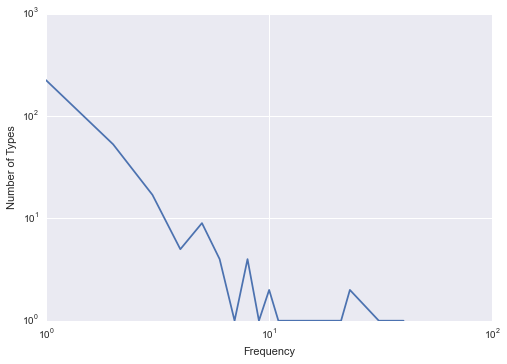

In [104]:
import seaborn as sns

xs = [i for i in range(1000) if fdist.Nr(i) > 0]
ys = [fdist.Nr(i) for i in xs]
sns.plt.loglog(xs, ys);
sns.plt.xlabel('Frequency'); sns.plt.ylabel('Number of Types');

In [105]:
all_reviews = Text(movie_reviews.words())
all_reviews.collocations()

special effects; new york; star wars; high school; science fiction;
even though; hong kong; star trek; pulp fiction; phantom menace; van
damme; united states; starship troopers; box office; jackie chan;
years ago; supporting cast; blair witch; boogie nights; las vegas


In [106]:
review.collocations()

nine months; nervous smiles; robin williams; ten year; terrible mess;
year olds; annoying friend; hugh grant


In [107]:
fdist = FreqDist(w.lower() for w in movie_reviews.words())
fdist.N()

1583820

In [108]:
fdist.most_common(n=10)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822)]

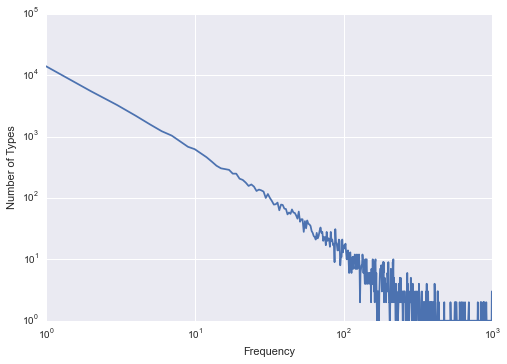

In [109]:
import seaborn as sns

xs = [i for i in range(1000) if fdist.Nr(i) > 0]
ys = [fdist.Nr(i) for i in xs]
sns.plt.loglog(xs, ys);
sns.plt.xlabel('Frequency'); sns.plt.ylabel('Number of Types');

- as the size of the corpus approaches infinity, the number of tokens that have appeared once approaches half the vocabulary.

# Sentiment Classification

## Classify movie reviews into positive / negative

In [22]:
movie_reviews.categories()

['neg', 'pos']

### Naive Bayes

$$P(C=\mbox{'pos'}\,|\, \vec{x}) = P(C=\mbox{'pos'}) \prod_{i=1}^n P(x_i\,|\,C=\mbox{'pos'})$$

- multiplying lost of probabilities together (underflow)
- more feeatures means smaller numbers

<table>
<tr><th>documents</th><th colspan=7><center>features</center></th></tr>
<tr><td></td> <td>,</td><td>the</td><td>.</td><td>a</td><td>and</td><td>of</td><td>to</td></tr>
<tr><td>0</td> <td>0</td><td>0</td><td>2</td><td>1</td><td>0</td><td>0</td><td>1</td></tr>
<tr><td>1</td> <td>1</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
<tr><td>2</td> <td>0</td><td>5</td><td>0</td><td>3</td><td>1</td><td>0</td><td>0</td></tr>
</table>

<table>
<tr><th>documents</th><th colspan=8><center>features</center></th></tr>
<tr><td></td> <td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>...</td></tr>
<tr><td>0</td> <td>0</td><td>0</td><td>2</td><td>1</td><td>0</td><td>0</td><td>1</td><td>...</td></tr>
<tr><td>1</td> <td>1</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td><td>0</td><td>...</td></tr>
<tr><td>2</td> <td>0</td><td>5</td><td>0</td><td>3</td><td>1</td><td>0</td><td>0</td><td>...</td></tr>
</table>

In [68]:
import random

fileids = movie_reviews.fileids()
random.shuffle(fileids)
train_fileids = [(fid, fid[:3]) for fid in fileids[100:]]
test_fileids = [(fid, fid[:3]) for fid in fileids[:100]]

# turn review into bag of words for Naive Bayes
def review_features(fileid):
    words = [w for w in movie_reviews.words(fileid)]
    document_features = {w: 1 for w in words}
    return document_features

In [69]:
from nltk import classify
nb = classify.NaiveBayesClassifier.train((review_features(fileid), c) for fileid, c in train_fileids)

In [70]:
classify.accuracy(nb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.7

In [71]:
nb.show_most_informative_features(10)

Most Informative Features
                  avoids = 1                 pos : neg    =     12.2 : 1.0
              astounding = 1                 pos : neg    =     12.2 : 1.0
                    slip = 1                 pos : neg    =     10.9 : 1.0
             fascination = 1                 pos : neg    =     10.9 : 1.0
             outstanding = 1                 pos : neg    =     10.5 : 1.0
               marvelous = 1                 pos : neg    =     10.5 : 1.0
                    3000 = 1                 neg : pos    =     10.5 : 1.0
                  hudson = 1                 neg : pos    =     10.5 : 1.0
               insulting = 1                 neg : pos    =     10.3 : 1.0
                seamless = 1                 pos : neg    =     10.2 : 1.0


In [72]:
import sklearn
from sklearn import pipeline
from sklearn import naive_bayes
from nltk.classify.scikitlearn import SklearnClassifier

pipeline = sklearn.pipeline.Pipeline([('clf', sklearn.naive_bayes.MultinomialNB())])
sklearn_mnb = SklearnClassifier(pipeline)
sklearn_mnb = sklearn_mnb.train((review_features(fileid), c) for fileid, c in train_fileids)

In [73]:
classify.accuracy(sklearn_mnb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.82

In [74]:
from nltk.corpus import stopwords

stopwords_english = set(stopwords.words('english'))

def keep_feature(w):
    keep = w not in stopwords_english
    keep = keep and w.isalpha()
    return keep

def review_features(fileid):
    words = [w for w in movie_reviews.words(fileid) if keep_feature(w)]
    document_features = {w: 1 for w in words}
    return document_features

In [75]:
nb = classify.NaiveBayesClassifier.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(nb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.68

In [76]:
sklearn_classif = SklearnClassifier(pipeline)
sklearn_classif.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(sklearn_classif, [(review_features(fileid), c) for fileid, c in test_fileids])

0.82

In [77]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords_english = set(stopwords.words('english'))

def keep_feature(w):
    keep = w not in stopwords_english
    keep = keep and w.isalpha()
    return keep

def review_features(fileid):
    words = [w for w in movie_reviews.words(fileid) if keep_feature(w)]
    document_features = {lemmatizer.lemmatize(w): 1 for w in words}
    return document_features

In [78]:
lemmatizer.lemmatize('wheeling')

'wheeling'

In [79]:
nb = classify.NaiveBayesClassifier.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(nb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.7

In [80]:
sklearn_classif = SklearnClassifier(pipeline)
sklearn_classif.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(sklearn_classif, [(review_features(fileid), c) for fileid, c in test_fileids])

0.82

In [81]:
nb.show_most_informative_features(10)

Most Informative Features
                  avoids = 1                 pos : neg    =     12.2 : 1.0
              astounding = 1                 pos : neg    =     12.2 : 1.0
              degenerate = 1                 neg : pos    =     11.1 : 1.0
             fascination = 1                 pos : neg    =     10.9 : 1.0
             outstanding = 1                 pos : neg    =     10.5 : 1.0
               marvelous = 1                 pos : neg    =     10.5 : 1.0
                  hudson = 1                 neg : pos    =     10.5 : 1.0
               insulting = 1                 neg : pos    =     10.3 : 1.0
                seamless = 1                 pos : neg    =     10.2 : 1.0
               ludicrous = 1                 neg : pos    =     10.0 : 1.0


In [82]:
from sklearn.feature_extraction.text import TfidfTransformer
from nltk import probability

def review_features(fileid):
    words = [w for w in movie_reviews.words(fileid) if keep_feature(w)]
    fdist = probability.FreqDist(words)
    document_features = {lemmatizer.lemmatize(w): fdist[w] for w in words}
    return document_features

pipeline = sklearn.pipeline.Pipeline([('tfidf', TfidfTransformer(norm='l2')),
                                      ('clf', sklearn.naive_bayes.MultinomialNB())])
sklearn_mnb = SklearnClassifier(pipeline)
sklearn_mnb.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(sklearn_mnb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.79

# Feature Values: boolean, raw frequency, TFIDF

$$tfidf(t, d, D) = tf(t,d) \times idf(t, D) $$

$$idf(t, D) = \log{\frac{N}{|\{d \in D : t \in d\}|}}$$

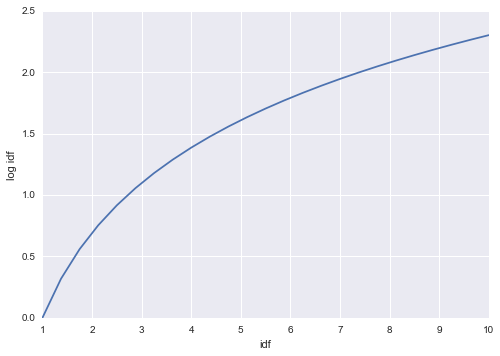

In [112]:
import numpy as np

sns.plt.plot(np.linspace(1, 10, 25), [np.math.log(y) for y in np.linspace(1, 10, 25)]);
sns.plt.ylabel('log idf');
sns.plt.xlabel('idf');

In [85]:
nb = classify.NaiveBayesClassifier.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(nb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.72

In [84]:
from sklearn.feature_selection import chi2, SelectKBest

pipeline = sklearn.pipeline.Pipeline([('chi2', SelectKBest(chi2, k=5000)),
                                      ('tfidf', TfidfTransformer(norm='l2')),
                                      ('clf', sklearn.naive_bayes.MultinomialNB())])
sklearn_mnb = SklearnClassifier(pipeline)
sklearn_mnb.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(sklearn_mnb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.82

- added parameters, more complex to fit the model
- need to do crossvalidation

In [113]:
pipeline = sklearn.pipeline.Pipeline([('tfidf', TfidfTransformer(norm='l2')),
                                      ('clf', sklearn.svm.LinearSVC())])
sklearn_mnb = SklearnClassifier(pipeline)
sklearn_mnb.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(sklearn_mnb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.86

In [114]:
from sklearn import tree
pipeline = sklearn.pipeline.Pipeline([('tfidf', TfidfTransformer(norm='l2')),
                                      ('clf', sklearn.tree.DecisionTreeClassifier())])
sklearn_mnb = SklearnClassifier(pipeline)
sklearn_mnb.train((review_features(fileid), c) for fileid, c in train_fileids)
classify.accuracy(sklearn_mnb, [(review_features(fileid), c) for fileid, c in test_fileids])

0.69

- smoothing (add one, Good Turing, Kneser Ney)
- grammatical features
- distributional features

-----

- **Linear kernel SVM (L1-regularised)** `sklearn.svm.LinearSVC`, `sklearn.linear_model.SGDClassifier`
- **lowercase features** `sklearn.feature_extraction.text.CountVectorizer`
- **tfidf feature values** `sklearn.feature_extraction.text.TfidfTransformer`

In [ ]:
import pandas

df = fdist

# POS Tagging

### Assign part-of-speech tags (`NN`, `NNP`, `NNS`, `JJ`, `VB`) to words. Default `nltk.tag.pos_tag` works pretty well (MaxEnt Tagger), but others are also available:

- `nltk.tag.DefaultTagger(NN)`
- `nltk.tag.UnigramTagger()`
    - unigrams + backoff
- `nltk.tag.HiddenMarkovModelTagger`
- need annotated corpora (PennTreebank)

In [219]:
# http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
from nltk import pos_tag
pos_tag("this talk is pretty interesting".split())

[('this', 'DT'),
 ('talk', 'NN'),
 ('is', 'VBZ'),
 ('pretty', 'RB'),
 ('interesting', 'JJ')]

In [5]:
from spacy.en import English
spc = English()
parsed_sent = spc("this talk is pretty interesting")

In [6]:
for i, token in enumerate(parsed_sent):
    print(token.pos_, token.pos, token.orth_)

ADJ 1 this
NOUN 8 talk
VERB 16 is
ADV 3 pretty
ADJ 1 interesting


# Information Extraction

## Named Entity Recognition

### Named entities are bits of a sentence that correspond to some real world thing

- Organisation
- Geo Political Entity
- Time
- Person
- Location

In [10]:
from nltk import corpus
corpus.movie_reviews.raw(corpus.movie_reviews.fileids()[0])[:400]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich i'

In [19]:
corpus.reuters.raw(corpus.reuters.fileids()[2])[:400]

'JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS\n  The Ministry of International Trade and\n  Industry (MITI) will revise its long-term energy supply/demand\n  outlook by August to meet a forecast downtrend in Japanese\n  energy demand, ministry officials said.\n      MITI is expected to lower the projection for primary energy\n  supplies in the year 2000 to 550 mln kilolitres (kl) from 600\n  mln, the'

In [22]:
corpus.reuters.raw(corpus.reuters.fileids()[4])

"INDONESIA SEES CPO PRICE RISING SHARPLY\n  Indonesia expects crude palm oil (CPO)\n  prices to rise sharply to between 450 and 550 dlrs a tonne FOB\n  sometime this year because of better European demand and a fall\n  in Malaysian output, Hasrul Harahap, junior minister for tree\n  crops, told Indonesian reporters.\n      Prices of Malaysian and Sumatran CPO are now around 332\n  dlrs a tonne CIF for delivery in Rotterdam, traders said.\n      Harahap said Indonesia would maintain its exports, despite\n  making recent palm oil purchases from Malaysia, so that it\n  could possibly increase its international market share.\n      Indonesia, the world's second largest producer of palm oil\n  after Malaysia, has been forced to import palm oil to ensure\n  supplies during the Moslem fasting month of Ramadan.\n      Harahap said it was better to import to cover a temporary\n  shortage than to lose export markets.\n      Indonesian exports of CPO in calendar 1986 were 530,500\n  tonnes, again

In [118]:
from spacy.en import English
spc = English()

In [116]:
parsed = spc("Bill Gates is not the head of Microsoft (MSFT), valued at $234M.")

In [117]:
list((w.orth_, w.pos_, w.ent_type_, w.dep_) for w in parsed)

[('Bill', 'NOUN', 'PERSON', 'compound'),
 ('Gates', 'NOUN', '', 'nsubj'),
 ('is', 'VERB', '', 'ROOT'),
 ('not', 'ADV', '', 'neg'),
 ('the', 'ADJ', '', 'det'),
 ('head', 'NOUN', '', 'attr'),
 ('of', 'ADP', '', 'prep'),
 ('Microsoft', 'NOUN', 'ORG', 'pobj'),
 ('(', 'PUNCT', '', 'punct'),
 ('MSFT', 'NOUN', 'ORG', 'appos'),
 (')', 'PUNCT', '', 'punct'),
 (',', 'PUNCT', '', 'punct'),
 ('valued', 'VERB', '', 'acl'),
 ('at', 'ADP', '', 'prep'),
 ('$', 'SYM', '', 'nmod'),
 ('234M.', 'NUM', 'MONEY', 'pobj')]

![parse](parse_tree.png)

In [119]:
import re

persons = set()
fileids = corpus.movie_reviews.fileids()
for fileid in fileids:
    doc = re.sub('\s+', ' ', corpus.movie_reviews.raw(fileids=[fileid]))
    parsed = spc(doc)
    for w in parsed:
        if w.ent_type_ == 'PERSON' and w.dep_ == 'compound':
            person = (w.orth_, w.head.orth_)
            persons.add(' '.join(person))

In [137]:
# a more convenient way of extracting entities
persons = set()
fileids = corpus.movie_reviews.fileids()
for fileid in fileids:
    doc = re.sub('\s+', ' ', corpus.movie_reviews.raw(fileids=[fileid]))
    parsed = spc(doc)
    for ent in parsed.ents:
        if ent.label_ == 'PERSON' and ent.end - ent.start > 1:
            persons.add(ent.text)

In [138]:
import random
random.sample(persons, k=15)

['clint eastwood',
 'paul sorvino',
 'jonathan breck',
 'al hayes',
 'matthew letscher',
 'tommy lee jones',
 'david webb',
 "alan cohn's",
 'david kellogg',
 "willem dafoe's",
 'wolfgang amadeus',
 'scott glenn',
 'charlie brewster',
 'ivan reitman',
 'eric goldberg']

Use POS tags and named entity chunks
- `nltk.pos_tag`
- `nltk.ne_chunk`

In [142]:
import nltk

persons_nltk = set()
fileids = random.sample(corpus.movie_reviews.fileids(), k=30)
for fileid in fileids:
    doc = re.sub('\s+', ' ', corpus.movie_reviews.raw(fileids=[fileid]))
    for sent in corpus.movie_reviews.sents(fileids=[fileid]):
        chunks = nltk.ne_chunk(nltk.pos_tag(sent))
        for chunk in chunks.subtrees():
            if chunk.label() == 'PERSON' and len(chunk) > 1:
                persons.add(tuple(chunk.leaves()))

In [24]:
# from nltk.corpus.reuters CATEGORY=Grain
list(random.sample(list(persons), k=15))

[(('John', 'NNP'), ('Danforth', 'NNP')),
 (('Treasury', 'NNP'), ('Bond', 'NNP')),
 (('Peter', 'NNP'), ('Baron', 'NNP')),
 (('Zhang', 'NNP'), ('Yan', 'NNP')),
 (('Export', 'NNP'), ('Enhancement', 'NNP')),
 (('Quaker', 'NNP'), ('Oats', 'NNP')),
 (('Jacques', 'NNP'), ('Chirac', 'NNP')),
 (('Economic', 'NNP'), ('Planning', 'NNP'), ('Agency', 'NNP')),
 (('Rahr', 'NNP'), ('Malting', 'NNP'), ('Co', 'NNP')),
 (('Tom', 'NNP'), ('Mulligan', 'NNP')),
 (('Dante', 'NNP'), ('Caputo', 'NNP')),
 (('Start', 'NNP'), ('Stcks', 'NNP')),
 (('Darwin', 'NNP'), ('E', 'NNP')),
 (('David', 'NNP'), ('Pryor', 'NNP')),
 (('Kika', 'NNP'), ('De', 'NNP'))]

In [33]:
# from nltk.corpus.bible
list(random.sample(list(persons), k=15))

[(('Tyrus', 'NNP'), ('Nebuchadrezzar', 'NNP')),
 (('Eden', 'NNP'), ('Cherubims', 'NNP')),
 (('Saint', 'NNP'), ('Matthew', 'NNP')),
 (('Simon', 'NNP'), ('Peter', 'NNP')),
 (('Assuredly', 'NNP'), ('Solomon', 'NNP')),
 (('Curse', 'NNP'), ('David', 'NNP')),
 (('Anathema', 'NNP'), ('Maranatha', 'NNP')),
 (('Eglah', 'NNP'), ('David', 'NNP')),
 (('Hushai', 'NNP'), ('David', 'NNP')),
 (('Wherein', 'NNP'), ('God', 'NNP')),
 (('O', 'NNP'), ('Solomon', 'NNP')),
 (('James', 'NNP'), ('Bible', 'NNP')),
 (('Our', 'NNP'), ('Father', 'NNP')),
 (('Shimea', 'NNP'), ('David', 'NNP')),
 (('O', 'NNP'), ('Satan', 'NNP'))]

#### Stanford NER
http://nlp.stanford.edu/software/CRF-NER.shtml

# Information Extraction

## Dependency Parsing

### MALT Parser
- http://www.maltparser.org/

# The yellow fish that swims in the sea

![](dep_tree1.png)

# I ate the food with the fork

### I used the fork to eat the food
### I ate the food that had the fork

![](dep_tree3.png)

# I thought Tom Hanks was fantastic

![](dep_tree2.png)

In [193]:
def is_person(entity):
    return ent.label_ == 'PERSON' and ent.end - ent.start > 1

def is_opinion(person):
    is_opinion = False
    try:
        is_opinion = next(ent.root.head.rights).dep_ == 'acomp'
    except StopIteration:
        pass
    
    is_opinion = is_opinion and ent.root.dep_ == 'nsubj'
    return is_opinion

In [194]:
opinions = set()
fileids = corpus.movie_reviews.fileids()
for fileid in fileids:
    doc = re.sub('\s+', ' ', corpus.movie_reviews.raw(fileids=[fileid]))
    parsed = spc(doc)
    for ent in parsed.ents:
        if is_person(ent) and is_opinion(ent):
            first, last = next(ent.root.lefts).orth_.capitalize(), ent.root.orth_.capitalize()
            opinions.add((first, last, next(ent.root.head.rights).orth_))

In [195]:
for first, last, adj in opinions:
    print(first, last, 'is', adj)

Andy Garcia is powerful
Actor Mccarthy is sleazy
Herbie Stempel is old
David Morse is competent
Even Broderick is dull
( Branagh is terrifying
Even Allen is pitiful
Kathleen Quinlan is annoying
David Arquette is impressive
Vanessa Redgrave is acknowledgeable
Brendan Fraser is great
Connie Britton is strung
David Lee is evil
( Isaacs is real
Rosanna Arquette is awful
Danny Glover is affable
Paul Giamatti is notable
Alec Baldwin is fat
Kenneth Branagh is able


In [197]:
import nltk
import os

# load the example model from http://www.maltparser.org/mco/mco.html
mp_home = os.path.expanduser('~/Documents/PUB_NLP/maltparser-1.7.2/')
mp_model = os.path.expanduser('~/Documents/PUB_NLP/maltparser-1.7.2/models/engmalt.poly-1.7.mco')
mp = nltk.parse.malt.MaltParser(mp_home, mp_model)

# other models exist http://nlp.stanford.edu/software/stanford-dependencies.shtml

In [199]:
dep_tree = mp.parse_tagged_sents([nltk.pos_tag('I thought Tom Hanks was fantastic.'.split())])
graph = next(next(iter(dep_tree)))
print(graph.to_conll(style=4))

I	PRP	2	nsubj
thought	VBD	0	ROOT
Tom	NNP	4	nn
Hanks	NNP	6	nsubj
was	VBD	6	cop
fantastic.	NNP	2	ccomp



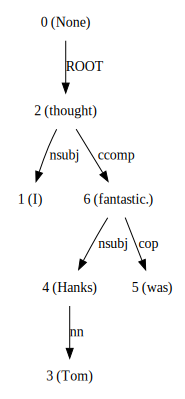

In [202]:
graph

In [119]:
person = ('Tom', 'Hanks')
opinions = []
nodes = graph.nodes
for nodeid, node in nodes.items():
    if node['rel'] == 'cop': # was
        head_node = nodes[node['head']] # fantastic
        if head_node['tag'] != 'JJ': continue
        for dep in head_node['deps']['nsubj']:
            dep_node = nodes[dep]
            if dep_node['word'] in person: # is this a NOUN we are interested in?
                person = [dep_node['word']]
                person.extend(nodes[d]['word'] for d in dep_node['deps']['nn'])
                person.reverse()
                opinions.append(tuple([tuple(person), head_node['word']]))

# Topic Modelling

### divide a corpus into topics based on distributional word usage


- topics are defined by how language is used, they don't necessarily correspond to what we think of topics

## distributional semantics

<table>
<tr><th>features</th><th colspan=7><center>features</center></th></tr>
<tr><td></td> <td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td></tr>
<tr><td>0</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>1</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>2</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>3</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>4</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>5</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>6</td> <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
</table>

In [245]:
import re
from nltk import corpus

def keep_token(token, tag):
    keep = re.search('(NN.*)|(VB.*)|(JJ)', tag) is not None
    keep = keep and token.isalpha()
    return keep

# preprocessing
with open(os.path.expanduser('~/Documents/PUB_nlp/lda.moviereviews.in.txt'), 'w') as out:
    for fileid in corpus.movie_reviews.fileids():
        pos_tagged_sents = nltk.pos_tag_sents(corpus.movie_reviews.sents(fileid))
        words = ['{}/{}'.format(lemmatizer.lemmatize(w), tag)
                                 for sent in pos_tagged_sents
                                 for w, tag in sent if keep_token(w, tag)]
        out.write(' '.join(words))
        out.write('\n')

In [246]:
# you can run shell commands in notebook - how awesome is that?
!wc -l ~/Documents/PUB_nlp/lda.moviereviews.in.txt

    2000 /Volumes/LocalDataHD/ml249/Documents/PUB_nlp/lda.moviereviews.in.txt


In [248]:
# you can run shell commands in notebook - how awesome is that?
!head -1 ~/Documents/PUB_nlp/lda.moviereviews.in.txt

moviemaking/VBG is/VBZ lot/NN being/VBG general/JJ manager/NN nfl/NN team/NN post/NN salary/NN cap/NN era/NN ve/VBP got/VBN know/VB allocate/VB resource/NNS dollar/NN spent/NN free/JJ agent/NN defensive/JJ tackle/NN is/VBZ le/JJR dollar/NN spend/VB linebacker/NNS safety/NNS center/NNS nfl/NN lead/NNS team/NNS detroit/NN lion/NNS superstar/NN running/VBG huge/JJ contract/NN field/VB guy/NNS named/VBD herb/NN block/VB movie/NNS end/VBP film/NNS spawn/NN huge/JJ special/JJ effect/NNS budget/NN money/NN hire/VB recognizable/JJ actor/NNS jackie/NN chan/VBD is/VBZ barry/NN sander/NNS moviemaking/VBG spin/VBZ dart/NNS screen/NN sander/NNS cutting/VBG defensive/JJ line/NN watching/VBG jackie/NN operation/NN condor/NN drive/VBZ motorcycle/NN crowded/VBN street/NNS madrid/JJ fleeing/VBG armada/NN pursuer/NNS identical/JJ black/NN compact/NN car/NNS is/VBZ reminiscent/JJ sander/NNS running/VBG daylight/JJ chicago/NNP bear/VBZ hot/JJ pursuit/NN sander/NNS doesn/VBP t/NN have/VBP worry/VB rescuing/

In [266]:
import gensim

# preprocess
dictionary = gensim.corpora.Dictionary()
with open(os.path.expanduser('~/Documents/PUB_nlp/lda.moviereviews.in.txt'), 'r') as fh:
    bow_stream = (article.split(' ') for article in fh)
    lda_corpus = (dictionary.doc2bow(bow, allow_update=True) for bow in bow_stream)
    gensim.corpora.MmCorpus.serialize(os.path.expanduser('~/Documents/PUB_nlp/lda.moviereviews.in.mm'), lda_corpus)

lda_corpus = gensim.corpora.MmCorpus(os.path.expanduser('~/Documents/PUB_nlp/lda.moviereviews.in.mm'))

In [267]:
list(dictionary.items())[:10]

[(32048, 'lend/VB'),
 (19093, 'circumcision/NN'),
 (45821, 'wandering/JJ'),
 (31249, 'kristen/VBP'),
 (30694, 'request/NN'),
 (17072, 'exalts/NNS'),
 (11989, 'spotty/JJ'),
 (22098, 'hardcore/VBP'),
 (20559, 'mindset/VBP'),
 (31951, 'synonym/NN')]

In [276]:
# train a TFIDF model
tfidf = gensim.models.TfidfModel(corpus=None, dictionary=dictionary, normalize=False)
corpus_tfidf = tfidf[lda_corpus]

In [282]:
# train LDA model
import pandas as pd
print(pd.to_datetime('now'))
lda = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dictionary,
                             num_topics=10, chunksize=100, iterations=100)
print(pd.to_datetime('now'))

2015-09-28 18:43:12
2015-09-28 18:43:31


In [283]:
import numpy as np
from scipy import stats
from IPython.display import display, HTML

def topics_html(topics):
    s = "<table width=100%>"
    maxent = 0
    words = set()
    for i, topic in enumerate(topics):
        phi = 0
        s += "<th colspan={}></th>".format(len(topic))
        s += "<tr>"
        for prob, _ in topic:
            s += "<td><center><b>%.2e</b></center</td>" % (prob)

        s += "</tr><tr>"
        for _, word in topic:
            s += "<td class=w_{0}><center><b>{0}</b> / {1}</center></td>".format(*word.split('/'))
            words.add(word.split('/')[0])
        s += "</tr>"
    s += "</table>"
    css = "<style>" + "".join([".w_%s:hover {background-color: #6f6f6f;}" %w for w in words]) + "</style>"
    return s, css

In [284]:
s, css = topics_html(lda.show_topics(num_topics=6, num_words=6, formatted=False))
display(HTML(css))
h = HTML(s); h

-----------

In [257]:
lda_enwiki = gensim.models.LdaModel.load('enwiki/lda.gensim')

In [271]:
s, css = topics_html(lda_enwiki.show_topics(num_topics=6, num_words=6, formatted=False))
display(HTML(css))
h = HTML(s); h

# Deep Learning

### State of the art in distributional semantics, translation, text to speech ...

#### Socher on Recurrent NNs for NLP
- https://www.youtube.com/watch?v=tdLmf8t4oqM

#### The Unreasonable Effectiveness of Recurrent Neural Networks
- https://karpathy.github.io/2015/05/21/rnn-effectiveness/?utm_content=bufferdca1b&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
- http://nbviewer.ipython.org/gist/yoavg/d76121dfde2618422139

# NLP and Python

- Matti Lyra
- @mattilyra
- m.lyra@sussex.ac.uk
- https://github.com/mattilyra/PUB_nlp
- http://paprr.co/

### Links
- http://ntlk.org
- http://nltk.org/book
- http://www.radimrehurek.com/gensim
- http://scikit-learn.org/stable/
- http://www.spacy.io (http://nicschrading.com/project/Intro-to-NLP-with-spaCy/)